<a href="https://colab.research.google.com/github/Sahar-DataScience/random/blob/main/TP1_image_classification_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importation des librairies 

In [ ]:
from numpy import *
from numpy.random import *
from math import*
from matplotlib.pyplot import*
from scipy.misc import*
import pandas as pd 

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation 
import matplotlib.pyplot as plt # affichage des images
import numpy as np 

### Chargement de la base de données MNIST des chiffres manuscrits

In [ ]:
# chargement de la base mnist (data et labels) et repartition en base d'apprentissage et base de test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Afficher les tailles de x_train et x_test 
print('x_train shape: ', x_train.shape) # (60000, 28, 28)
print('x_test shape: ', x_test.shape) # (10000, , 28)

# afficher les tailles de y_train et y_test (vecteurs des labels)
print('y_train shape: ', y_train.shape) # (60000, 1)
print('y_test shape: ', y_test.shape) # (10000, 1)

x_train shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)
y_train shape:  (60000,)
y_test shape:  (10000,)


In [ ]:
#dir(x_train)


### Affichafge d'une image aléatoirement

3


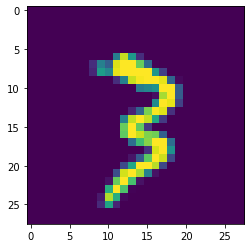

In [ ]:
plt.imshow(x_train[25000])
print(y_train[25000])

### Normaliser les valeurs de "x_train" et "x_test"

In [ ]:
# convertir x_train et x_test en float pour les normaliser dans l'intervalle [0..1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Normaliser les valeurs de "x_train" et "x_test"

In [ ]:
# Adapter x_train et x_test au format de la couche d'entrée du MLP
x_train = x_train.reshape(60000, 28*28 ) # (60000, 784)
x_test = x_test.reshape(10000, 28*28) # (10000, 784)

print('train samples shape: ', x_train.shape )
print('test samples shape: ', x_test.shape)

train samples shape:  (60000, 784)
test samples shape:  (10000, 784)


### Adapter les vecteurs de labels "y_train" et "y_test" au formt de la couche de sortie du MLP

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes ) # exemple: le label 5 devient le vecteur [ 0 0 0 0 1 0 0 0 0 0]
y_test = keras.utils.to_categorical(y_test, num_classes) # exemple: le label 10 devient le vecteur [ 0 0 0 0 0 0 0 0 0 1]

print('y_train shape: ', y_train.shape) # (60000, 10)
print('y_test shape: ', y_test.shape) # (10000, 10)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


### implementation du MLP

In [ ]:
model = Sequential()

# couche cachée 1
model.add(Dense( 512 , input_shape=(784,))) # couche fully-connected contenant 512 neurones
model.add(Activation('relu')) # couche d'activaton relu
model.add(Dropout(0.2)) # dropout avec propbabilité 0.2

# couche cachée 2
model.add(Dense(512)) # couche Fully-connected contenant 512 neurones
model.add(Activation('relu')) # couche activation relu 
model.add(Dropout(0.2)) # dropout avec probabilité 0.2

# couche de sortie
model.add(Dense(10)) # nombre de neurones de la couche de sortie est egale au nombre de classes (10)
model.add(Activation('softmax')) # softmax permet de convertir les sorties du MLP en probabilitées

# Afficher l'architecture du modèle MLP implémenté
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5

### Définir les paramètres d'apprentissage du MLP

In [ ]:
# configurer les paramètres du modèle: méthide calcul de l'erreur, optimizer (méthode de mis à jour des poids)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001, decay=1e-6),
              metrics=['accuracy'])

### Apprentissage du modèle MLP

In [ ]:
epochs=20 # nombre propagation et rétro-propagation de l'erreur dans la phase d'apprentissage 
batch_size=128 # nombre d'images propagées simultanément dans le modèle MLP
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 8s 17ms/step - loss: 0.2503 - accuracy: 0.9241 - val_loss: 0.1238 - val_accuracy: 0.9642
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0987 - accuracy: 0.9696 - val_loss: 0.0847 - val_accuracy: 0.9744
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0705 - accuracy: 0.9779 - val_loss: 0.0756 - val_accuracy: 0.9779
Epoch 4/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0556 - accuracy: 0.9822 - val_loss: 0.0662 - val_accuracy: 0.9798
Epoch 5/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0703 - val_accuracy: 0.9799
Epoch 6/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0389 - accuracy: 0.9871 - val_loss: 0.0695 - val_accuracy: 0.9804
Epoch 7/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0344 - accuracy: 0.9887 - val_loss: 0.0697 - val_accuracy: 0.9807

### Evaluation du modèle MLP

In [ ]:
# affichage du résultat
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08251955360174179
Test accuracy: 0.9836000204086304


### Tester un échantillon aléatoirement

Limage contient le chiffre: 5


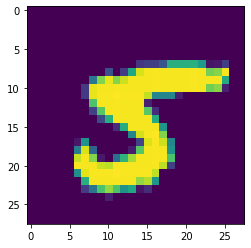

In [ ]:
# Tester un echantillon de x_test 
nb_echantillon=3890
img_test=np.expand_dims(x_test[nb_echantillon], axis=0)
output=model.predict(img_test) 
plt.imshow(img_test.reshape(28, 28))
print('L''image contient le chiffre:', np.argmax(output))